In [1]:
import numpy as np

from qiskit import BasicAer
from qiskit.circuit.library import ZZFeatureMap
from qiskit.aqua import QuantumInstance, aqua_globals
from qiskit.aqua.algorithms import QSVM
from qiskit.aqua.components.multiclass_extensions import AllPairs
from qiskit.aqua.utils.dataset_helper import get_feature_dimension

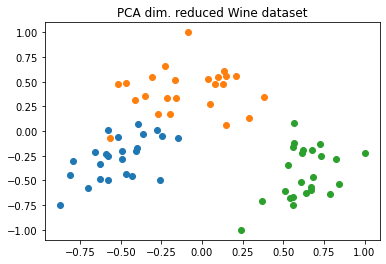

In [2]:
from qiskit.ml.datasets import wine

n = 2  # dimension of each data point
sample_Total, training_input, test_input, class_labels = wine(training_size=24,
                                                              test_size=6, n=n, plot_data=True)
temp = [test_input[k] for k in test_input]
total_array = np.concatenate(temp)

In [3]:
aqua_globals.random_seed = 10598

backend = BasicAer.get_backend('qasm_simulator')
feature_map = ZZFeatureMap(feature_dimension=get_feature_dimension(training_input),
                           reps=2, entanglement='linear')
svm = QSVM(feature_map, training_input, test_input, total_array,
           multiclass_extension=AllPairs())
quantum_instance = QuantumInstance(backend, shots=1024,
                                   seed_simulator=aqua_globals.random_seed,
                                   seed_transpiler=aqua_globals.random_seed)

result = svm.run(quantum_instance)
for k,v in result.items():
    print(f'{k} : {v}')

MissingOptionalLibraryError: "The 'CVXPY' library is required to use 'optimize_svm'. You can install it with 'pip install qiskit-aqua[cvx]'."